In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from  bnse import *
import statsmodels.api as sm

In [2]:
example = 'hr1'

if example=='hr1':
    signal = np.loadtxt('data/hr2.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'hr2':
    signal = np.loadtxt('data/hr1.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'sunspots':
    dta = sm.datasets.sunspots.load_pandas().data
    signal = np.array(dta.SUNACTIVITY)
    time = np.array(dta.YEAR)
    time_label = 'time'
    signal_label = 'sunspot data'
        
signal = signal - np.mean(signal)
#you can change the number of observations here
#indices = np.random.randint(0, len(time), size=int(len(time))) 
indices = np.random.randint(0, len(time), size=600) 
indices =np.sort(indices)
signal = signal[indices]
time = time[indices]
my_bse = bse(time, signal)
my_bse.set_labels(time_label, signal_label)

if example=='hr1':
    my_bse.set_freqspace(0.03)
elif example == 'hr2':
    my_bse.set_freqspace(0.03)
elif example == 'sunspots':
    my_bse.set_freqspace(0.2)

Negative log likelihood (before training): 1270.9566426237766


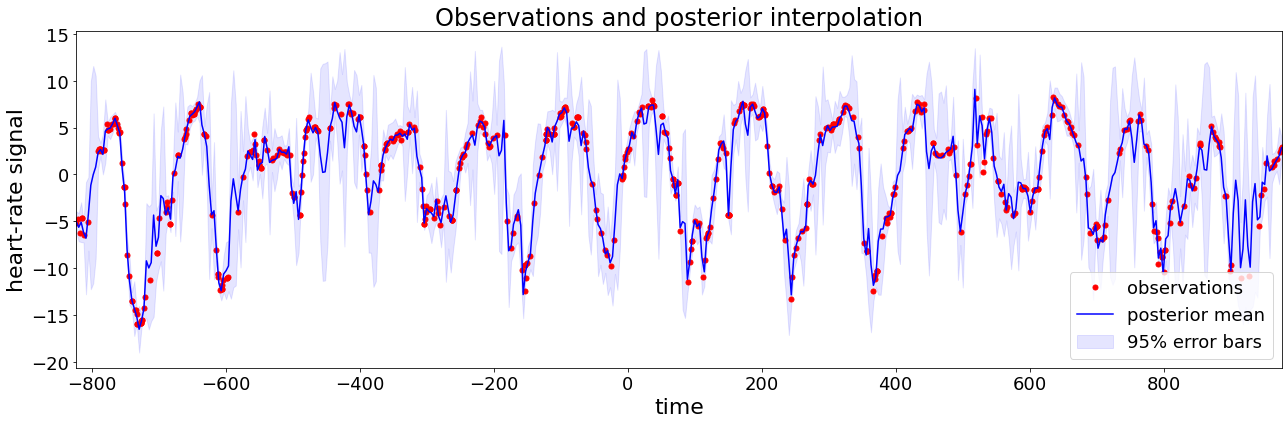

In [3]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()


In [4]:
print(my_bse.theta)

0.01


In [5]:
%%time 
my_bse.train()


Hyperparameters are:
sigma =4.885141470574594
gamma =0.0068004822766614985
theta =0.00033500031856197694
sigma_n =0.6607591390130062
CPU times: user 22.4 s, sys: 407 ms, total: 22.8 s
Wall time: 5.78 s


In [6]:
print(my_bse.theta)

0.00033500031856197694


Negative log likelihood (before training): 1050.9250355781082


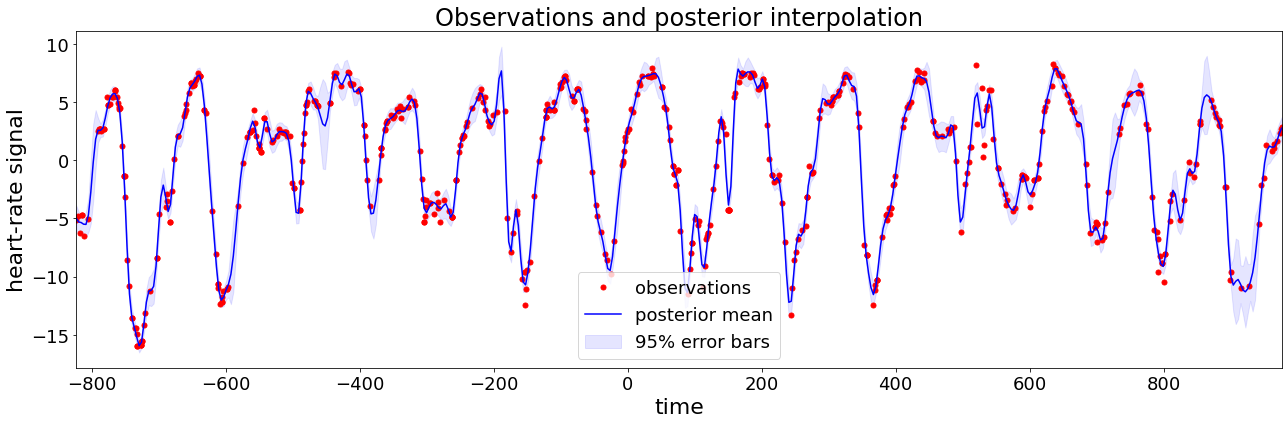

In [7]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()
plt.savefig("posterior_time.pdf", bbox_inches='tight', pad_inches=0)

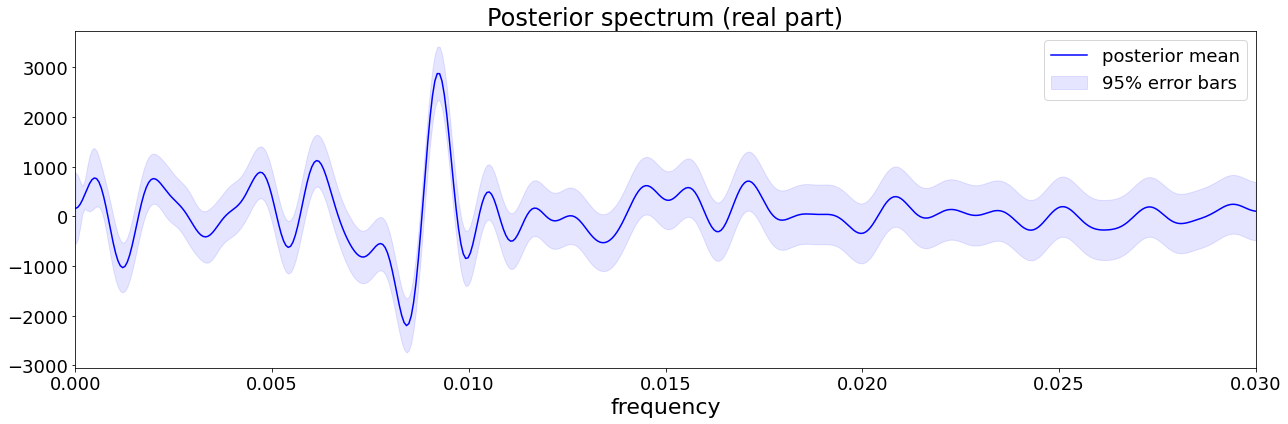

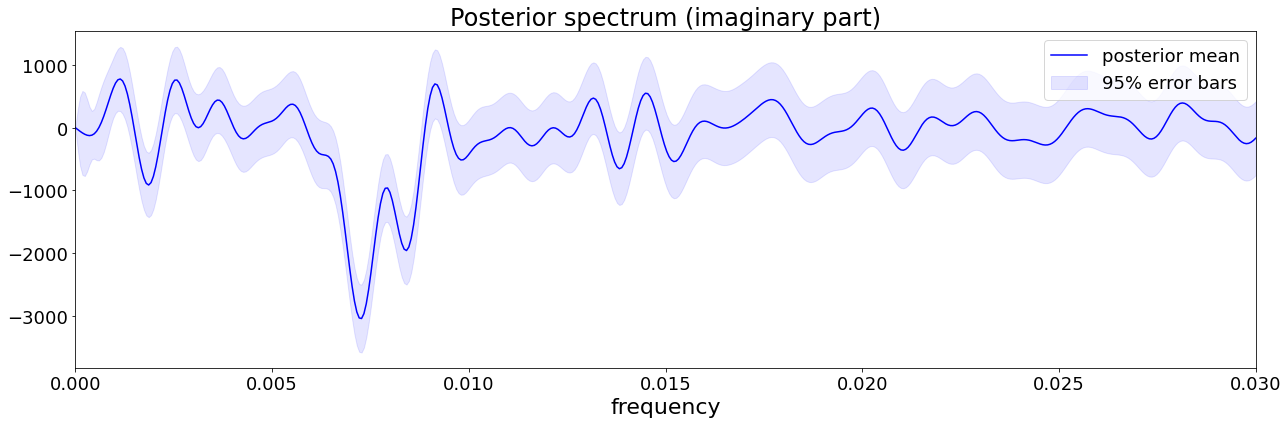

In [8]:
my_bse.plot_freq_posterior_real()
plt.savefig("posterior_spectrum_real.pdf", bbox_inches='tight', pad_inches=0)
my_bse.plot_freq_posterior_imag()
plt.savefig("posterior_spectrum_imag.pdf", bbox_inches='tight', pad_inches=0)


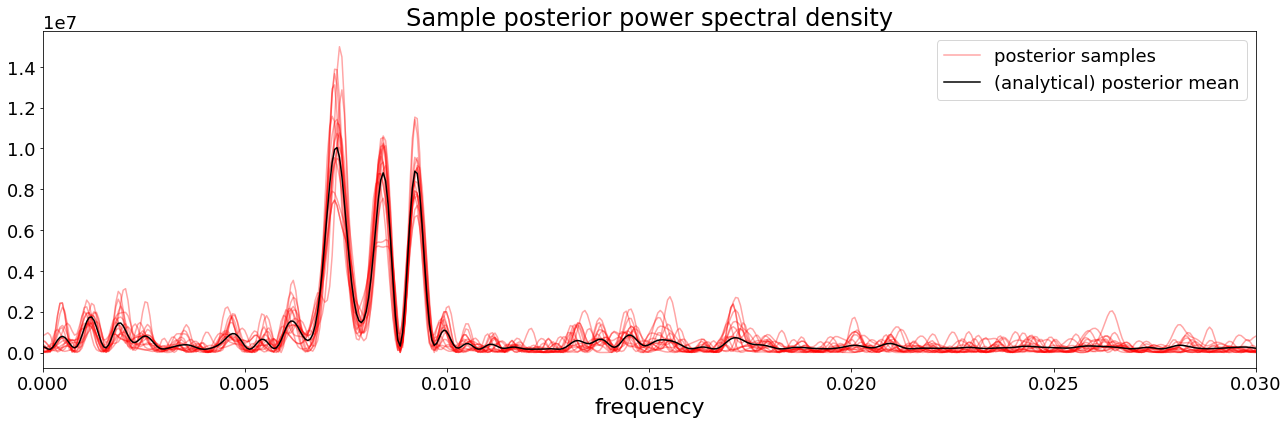

In [9]:
my_bse.plot_power_spectral_density(15)

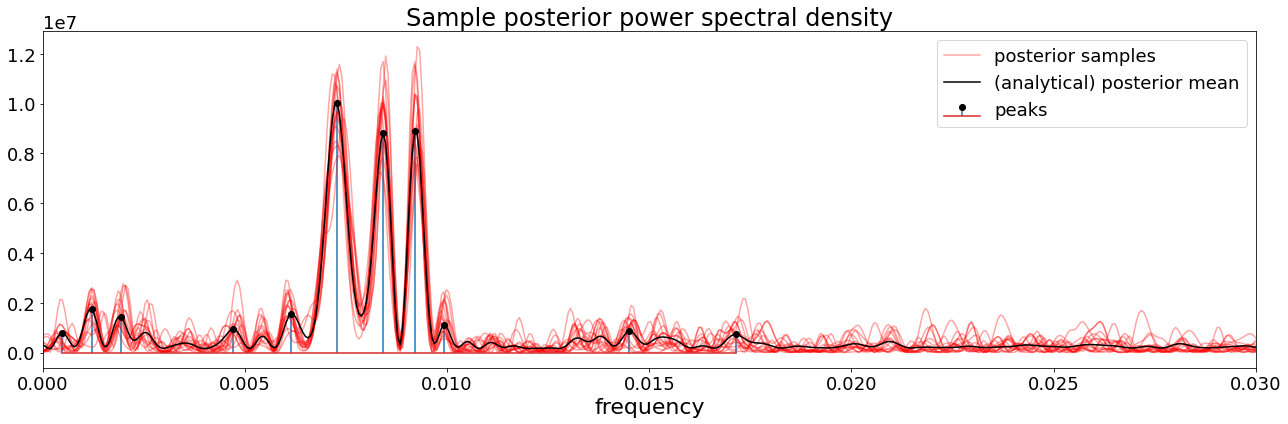

In [10]:
peaks, widths = my_bse.plot_power_spectral_density(15, 'show peaks');
plt.savefig("posterior_psd.pdf", bbox_inches='tight', pad_inches=0)

In [11]:
print(f'Peaks are at positions {peaks*(my_bse.w[1]-my_bse.w[0]) }')
print(f'and their widths are {widths[0]*(my_bse.w[1]-my_bse.w[0])}')

Peaks are at positions [0.00048096 0.0012024  0.00192385 0.00468938 0.00613226 0.00727455
 0.00841683 0.0091984  0.00991984 0.01448898 0.01713427]
and their widths are [0.00030547 0.00038628 0.00038339 0.00046624 0.0003719  0.00059521
 0.00042216 0.00041128 0.00026737 0.00042836 0.00059814]
